<a href="https://colab.research.google.com/github/fornieligulo/NBC-Tweet-Translate/blob/main/Langkah3_SKRIPSI_Processing_Data_Siap_Inggris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MENGHITUNG CLASSIFIER TWEET | TRANSLATE | HITUNG SENTIMEN**

In [26]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import googletrans
from googletrans import Translator

In [28]:
def load_data():
    data = pd.read_csv('Data_Hasil_Processing_Tweet.csv')
    return data

tweet_df = load_data()
tweet_df.head()

,date,time,username,tweet
0,29/01/2023,6:37:20,pejuangmslim,rakyat percaya institusi semenjak sambo gak ke...
1,29/01/2023,18:04:53,lmh1640,tidak suka mulia drpd benci oke logika nggak b...
2,29/01/2023,23:28:50,irfansambo,amin moga sakinah mawadah warohmah
3,20/01/2023,7:40:23,johnyjoe76,abai pasal eliezer orang sipil perintah bintan...
4,26/01/2023,9:43:32,pr_tasikmalaya,abdi buah dakwa bunuh bharada e serah putus ma...


In [30]:
#definisi dataframe
#ubah dataframe sesuai column kalian
df  = pd.DataFrame(tweet_df[['date','time','username','tweet']])
df

,date,time,username,tweet
0,29/01/2023,6:37:20,pejuangmslim,rakyat percaya institusi semenjak sambo gak ke...
1,29/01/2023,18:04:53,lmh1640,tidak suka mulia drpd benci oke logika nggak b...
2,29/01/2023,23:28:50,irfansambo,amin moga sakinah mawadah warohmah
3,20/01/2023,7:40:23,johnyjoe76,abai pasal eliezer orang sipil perintah bintan...
4,26/01/2023,9:43:32,pr_tasikmalaya,abdi buah dakwa bunuh bharada e serah putus ma...
...,...,...,...,...
14880,08/01/2023,18:41:30,frhyan_abdlh,yup bagaimna bharada e yg tembak nikmat uang b...
14881,28/12/2022,11:24:42,bayusteelheart,yup tuju goblok bharada e arti perintah nyawa ...
14882,16/01/2023,10:32:32,anisanbl12,yups tuh si sambo aja gk kasih perintah tembak...
14883,30/01/2023,6:45:50,xxrabbitstar,yuuk jeno arrival jeno shopee thai jeno cheere...


In [31]:
translator = Translator()
translations = {}
for column in df.columns:
  unique_elements = df[column].unique()
  for element in unique_elements:
    translations[element] = translator.translate(element).text
translations

{'29/01/2023': '29/01/2023',
 '20/01/2023': '20/01/2023',
 '26/01/2023': '26/01/2023',
 '26/12/2022': '26/12/2022',
 '30/12/2022': '30/12/2022',
 '09/12/2022': '09/12/2022',
 '04/01/2023': '04/01/2023',
 '18/01/2023': '18/01/2023',
 '06/11/2022': '06/11/2022',
 '20/12/2022': '20/12/2022',
 '19/12/2022': '19/12/2022',
 '15/12/2022': '15/12/2022',
 '05/12/2022': '05/12/2022',
 '28/12/2022': '28/12/2022',
 '14/12/2022': '14/12/2022',
 '11/01/2023': '11/01/2023',
 '23/12/2022': '23/12/2022',
 '05/01/2023': '05/01/2023',
 '07/11/2022': '07/11/2022',
 '27/01/2023': '27/01/2023',
 '30/11/2022': '30/11/2022',
 '21/01/2023': '21/01/2023',
 '17/01/2023': '17/01/2023',
 '12/12/2022': '12/12/2022',
 '19/01/2023': '19/01/2023',
 '25/12/2022': '25/12/2022',
 '21/12/2022': '21/12/2022',
 '10/12/2022': '10/12/2022',
 '24/12/2022': '24/12/2022',
 '07/12/2022': '07/12/2022',
 '23/01/2023': '23/01/2023',
 '08/09/2022': '08/09/2022',
 '08/12/2022': '08/12/2022',
 '25/01/2023': '25/01/2023',
 '27/12/2022':

In [32]:
#mengganti semua kata yang di terjemakan dari kamus original dataframe
df.replace(translations, inplace = True)
df

,date,time,username,tweet
0,29/01/2023,6:37:20,muslim fighters,people believe in institutions since sambo doe...
1,29/01/2023,18:04:53,lmh1640,don't like noble rather than hate okay logic d...
2,29/01/2023,23:28:50,irfansambo,"Amen, I hope you will be sakinah, mawaddah, wa..."
3,20/01/2023,7:40:23,johnyjoe76,ignore the article eliezer civilians order sta...
4,26/01/2023,9:43:32,pr tasikmalaya,Servant of the indictment of killing Bharada e...
...,...,...,...,...
14880,08/01/2023,18:41:30,Farah replaces it,"yup, how about Bharada E, who shot delicious m..."
14881,28/12/2022,11:24:42,bayusteelheart,yup go to the idiot bharada e the meaning of t...
14882,16/01/2023,10:32:32,among 12,"yup, Sambo didn't give the order to shoot, it ..."
14883,30/01/2023,6:45:50,xxrabbitstar,Uyuk Geno Rariwal: Geno Shopee Geno Chirevant ...


In [33]:
df.to_csv('Data_translate_processing_tweet.csv',encoding='utf8', index=False)

In [34]:
import pandas as pandas
def load_data():
  data = pd.read_csv('Data_translate_processing_tweet.csv')
  return data

In [35]:
tweet_df = load_data()
tweet_df.head()

,date,time,username,tweet
0,29/01/2023,6:37:20,muslim fighters,people believe in institutions since sambo doe...
1,29/01/2023,18:04:53,lmh1640,don't like noble rather than hate okay logic d...
2,29/01/2023,23:28:50,irfansambo,"Amen, I hope you will be sakinah, mawaddah, wa..."
3,20/01/2023,7:40:23,johnyjoe76,ignore the article eliezer civilians order sta...
4,26/01/2023,9:43:32,pr tasikmalaya,Servant of the indictment of killing Bharada e...


In [37]:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [40]:
scores = [analyser.polarity_scores(x) for x in tweet_df['tweet']]
print(scores)
tweet_df['Compound_Score'] = [x['compound'] for x in scores]

tweet_df.head(5)

[{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.2235}, {'neg': 0.329, 'neu': 0.396, 'pos': 0.275, 'compound': -0.3304}, {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}, {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.6597}, {'neg': 0.253, 'neu': 0.747, 'pos': 0.0, 'compound': -0.6597}, {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.34}, {'neg': 0.206, 'neu': 0.712, 'pos': 0.082, 'compound': -0.5423}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.061, 'neu': 0.868, 'pos': 0.071, 'compound': 0.1027}, {'neg': 0.401, 'neu': 0.454, 'pos': 0.145, 'compound': -0.9062}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}, {'neg': 0.231, 'neu': 0.579, 'pos': 0.19, 'compound': -0.128}, {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.6808}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.139, 'neu': 0.696, 'pos': 0.165, 'compound': 0.1027}, {'neg': 0.0, '

,date,time,username,tweet,Compound_Score
0,29/01/2023,6:37:20,muslim fighters,people believe in institutions since sambo doe...,0.2235
1,29/01/2023,18:04:53,lmh1640,don't like noble rather than hate okay logic d...,-0.3304
2,29/01/2023,23:28:50,irfansambo,"Amen, I hope you will be sakinah, mawaddah, wa...",0.4404
3,20/01/2023,7:40:23,johnyjoe76,ignore the article eliezer civilians order sta...,-0.6597
4,26/01/2023,9:43:32,pr tasikmalaya,Servant of the indictment of killing Bharada e...,-0.6597


In [41]:
tweet_df.loc[tweet_df['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'
tweet_df.loc[tweet_df['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
tweet_df.loc[tweet_df['Compound_Score'] > 0, 'Sentiments'] = 'Positif'
tweet_df.head()

,date,time,username,tweet,Compound_Score,Sentiments
0,29/01/2023,6:37:20,muslim fighters,people believe in institutions since sambo doe...,0.2235,Positif
1,29/01/2023,18:04:53,lmh1640,don't like noble rather than hate okay logic d...,-0.3304,Negatif
2,29/01/2023,23:28:50,irfansambo,"Amen, I hope you will be sakinah, mawaddah, wa...",0.4404,Positif
3,20/01/2023,7:40:23,johnyjoe76,ignore the article eliezer civilians order sta...,-0.6597,Negatif
4,26/01/2023,9:43:32,pr tasikmalaya,Servant of the indictment of killing Bharada e...,-0.6597,Negatif


In [42]:
tweet_df.to_csv('Data_sentiment_processing_tweet.csv',encoding='utf8', index=False)

14885


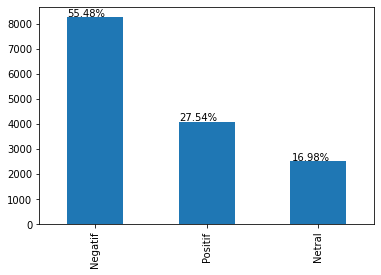

In [43]:
s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar()
n = len(tweet_df.index)
print(n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n*100, 2)) + '%', (p.get_x() * 1.005, p.get_height() *1.005))

In [44]:
import pandas as pandas
import pandas as pd

def load_data():
  data = pd.read_csv('Data_sentiment_processing_tweet.csv')
  return data

In [45]:
tweet = load_data()
tweet.head()

,date,time,username,tweet,Compound_Score,Sentiments
0,29/01/2023,6:37:20,muslim fighters,people believe in institutions since sambo doe...,0.2235,Positif
1,29/01/2023,18:04:53,lmh1640,don't like noble rather than hate okay logic d...,-0.3304,Negatif
2,29/01/2023,23:28:50,irfansambo,"Amen, I hope you will be sakinah, mawaddah, wa...",0.4404,Positif
3,20/01/2023,7:40:23,johnyjoe76,ignore the article eliezer civilians order sta...,-0.6597,Negatif
4,26/01/2023,9:43:32,pr tasikmalaya,Servant of the indictment of killing Bharada e...,-0.6597,Negatif


14885


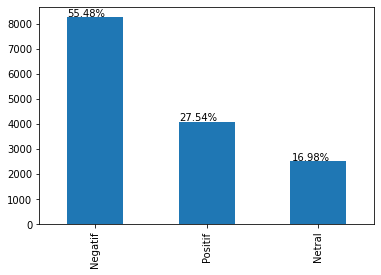

In [46]:
s = pd.value_counts(tweet['Sentiments'])
ax = s.plot.bar()
n = len(tweet.index)
print(n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n*100, 2)) + '%', (p.get_x() * 1.005, p.get_height() *1.005))